In [23]:
"""
Created on Thu Oct  4 16:25:31 2018

@author: mahlborg

File: Formatted_To_Consolidated
"""

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 550)
pd.set_option('display.max_columns', 20)

#from LBC_Viz import *


countries_mapped_to_currencies = pd.read_csv('/Users/mahlborg/Desktop/Metis/LBC/Supporting Data/countries_mapped_to_currencies.csv')
countries_mapped_to_currencies.columns = ['COUNTRY', 'CURRENCY', 'TICKER']
countries_mapped_to_currencies.loc[len(countries_mapped_to_currencies)] = ["Central Africa", "Central Africa Franc", "XAF"]
set1 = set(countries_mapped_to_currencies['TICKER'])
#GDP_PPP_PC column creation
GDP_PPP_PC = pd.read_csv('/Users/mahlborg/Desktop/Metis/LBC/Supporting Data/GDP_PPP.csv')
GDP_PPP_PC.columns = ['COUNTRY', 'GDP_PPP_PC']
GDP_PPP_PC['GDP_PPP_PC'] = GDP_PPP_PC['GDP_PPP_PC'].str.replace(',', '')
GDP_PPP_PC['GDP_PPP_PC'] = pd.to_numeric(GDP_PPP_PC['GDP_PPP_PC'], errors = 'coerce')
GDP_PPP_PC.loc[len(GDP_PPP_PC)] = ["West Africa", 2077]
GDP_PPP_PC.loc[len(GDP_PPP_PC)] = ["Central Africa", 4107]
GDP_PPP_PC.loc[len(GDP_PPP_PC)] = ["European Union", 39970]
#print(GDP_PPP_PC)

combined_df = pd.merge(countries_mapped_to_currencies, GDP_PPP_PC , on='COUNTRY')
set2 = set(combined_df['TICKER'])
#COUNTRY_POP column creation
#print(combined_df)
COUNTRY_POP = pd.read_csv('/Users/mahlborg/Desktop/Metis/LBC/Supporting Data/COUNTRY_POP.csv')
COUNTRY_POP.columns = ['COUNTRY', 'POPULATION']
COUNTRY_POP['POPULATION'] = COUNTRY_POP['POPULATION'].str.replace(',', '')
COUNTRY_POP['POPULATION'] = pd.to_numeric(COUNTRY_POP['POPULATION'], errors = 'coerce')
COUNTRY_POP.loc[len(COUNTRY_POP)] = ["European Union", 509000000]
COUNTRY_POP.loc[len(COUNTRY_POP)] = ["West Africa", 129000000]
COUNTRY_POP.loc[len(COUNTRY_POP)] = ["Central Africa", 52000000]
#print(COUNTRY_POP)
combined_df = pd.merge(combined_df, COUNTRY_POP , on='COUNTRY')
set3 = set(combined_df['TICKER'])
#Corruption Column creation
CORRUPTION = pd.read_csv('/Users/mahlborg/Desktop/Metis/LBC/Supporting Data/2018_Corruption_Scores.csv')
CORRUPTION.columns = ['COUNTRY', 'CORRUPTION_SCORE']
#print(CORRUPTION)
CORRUPTION['CORRUPTION_SCORE'] = pd.to_numeric(CORRUPTION['CORRUPTION_SCORE'], errors = 'coerce')
CORRUPTION.loc[len(CORRUPTION)] = ["West Africa", 33]
CORRUPTION.loc[len(CORRUPTION)] = ["Central Africa", 23]
CORRUPTION.loc[len(CORRUPTION)] = ["European Union", 70]


combined_df = pd.merge(combined_df, CORRUPTION , on='COUNTRY')
set4 = set(combined_df['TICKER'])
#print(combined_df)
#Inflation Column creation
INFLATION = pd.read_csv('/Users/mahlborg/Desktop/Metis/LBC/Supporting Data/2018_Inflation.csv')
INFLATION.columns = ['COUNTRY', 'INFLATION']
INFLATION['INFLATION'] = pd.to_numeric(INFLATION['INFLATION'], errors = 'coerce')
INFLATION.loc[len(INFLATION)] = ["West Africa", 2.2]
INFLATION.loc[len(INFLATION)] = ["Central Africa", 8.9]
combined_df = pd.merge(combined_df, INFLATION , on='COUNTRY')
set5 = set(combined_df['TICKER'])
#Internet_PEN column creation
INTERNET_PEN = pd.read_csv('/Users/mahlborg/Desktop/Metis/LBC/Supporting Data/2017_Internet_Penetration.csv')
INTERNET_PEN.columns = ['COUNTRY', 'INTERNET_PEN']
INTERNET_PEN['INTERNET_PEN'] = pd.to_numeric(INTERNET_PEN['INTERNET_PEN'], errors = 'coerce')
INTERNET_PEN.loc[len(INTERNET_PEN)] = ["West Africa", 13.4]
INTERNET_PEN.loc[len(INTERNET_PEN)] = ["Central Africa", 8.5]
INTERNET_PEN.loc[len(INTERNET_PEN)] = ["European Union", 79.8]
combined_df = pd.merge(combined_df, INTERNET_PEN , on='COUNTRY')
set6 = set(combined_df['TICKER'])
#Average Transaction Size column creation
Country_Metrics_Annual['AVG_TX_SIZE_USD'] = Country_Metrics_Annual['USD_EQUIV'] / (Country_Metrics_Annual['TX'][Country_Metrics_Annual['TX'] > 0])
#print(Country_Metrics_Annual)

Country_Metrics_Annual = pd.merge(Country_Metrics_Annual, combined_df , on='TICKER')

#UPEP column creation
Country_Metrics_Annual['UPEP'] = ((Country_Metrics_Annual['USD_EQUIV'] / Country_Metrics_Annual['POPULATION']) / Country_Metrics_Annual['GDP_PPP_PC']) * 1000
#Country_Metrics_Annual['UPEP'] = Country_Metrics_Annual.groupby(pd.Grouper(freq='A')).UPEP.mean()

Challenge 1


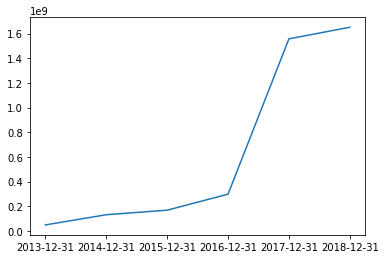

In [24]:
import pandas as pd
from matplotlib import pyplot as plt


#Challenge 1
#Plot domestic total gross over time.
#Plot total USD value transferred over time.
print('Challenge 1')
print(plt.plot(Country_Metrics_Annual.groupby('DATE')['USD_EQUIV'].sum()))


Challenge 2


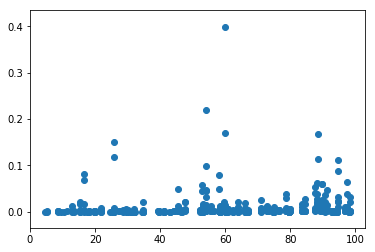

In [25]:
#Challenge 2
#Plot runtime vs. domestic total gross.
#Plot UPEP vs. Internet Penetration.
print('Challenge 2')
print(plt.scatter(Country_Metrics_Annual['INTERNET_PEN'], Country_Metrics_Annual['UPEP']))


In [26]:
#Challenge 3
#Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.
#Group your data by DATE and find average # of Transactions per country and average transaction size for each year.
print('Challenge 3')
print(Country_Metrics_Annual.groupby('DATE')['TX'].mean())
print(Country_Metrics_Annual.groupby('DATE')['AVG_TX_SIZE_USD'].mean())



Challenge 3
DATE
2013-12-31     2369.022727
2014-12-31     4944.984375
2015-12-31     7779.971429
2016-12-31    13230.802817
2017-12-31    32954.035294
2018-12-31    43501.880952
Name: TX, dtype: float64
DATE
2013-12-31    400.743893
2014-12-31    300.786706
2015-12-31    330.102955
2016-12-31    360.602665
2017-12-31    586.588552
2018-12-31    662.264267
Name: AVG_TX_SIZE_USD, dtype: float64


Challenge 4


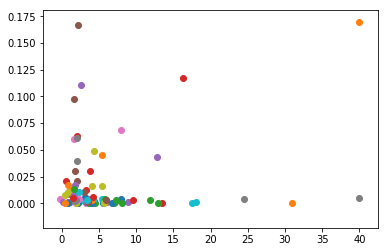

In [27]:
#Challenge 4
#Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.
#Make on figure with n = the number of currencies there are, and in each plot the UPEP vs the Inflation rate for a given year
print('Challenge 4')
TICKERS = ['DZD', 'NAD', 'GHS', 'EGP', 'BGN', 'PAB', 'BOB', 'DKK', 'BWP', \
        'TZS', 'VND', 'AOA', 'KHR', 'MYR', 'UAH', 'JOD', 'SAR', \
            'HKD', 'CHF', 'ALL', \
        'BYN', 'HRK', 'SZL', 'THB', 'XAF', 'ISK', 'UYU', \
        'LAK', 'MAD', 'MZN', 'PHP', 'ZAR', 'NPR', 'NGN', 'CRC',\
        'AED', 'MWK', 'LKR', 'PKR', 'HUF', 'LSL', 'AMD', 'UGX', \
        'QAR', 'JMD', 'GEL', 'AFN', 'TRY', 'BDT', \
        'YER', 'XOF', 'MGA', 'RWF', 'NOK', 'INR', \
        'MXN', 'CZK', 'TWD', 'COP', 'MUR', 'IDR', 'HNL', \
        'ETB', 'PEN', 'ILS', 'DOP', 'SEK', \
        'AUD', 'KRW',\
          'CLP', 'ZMW', 'VES', 'KZT', \
    'BRL', 'PLN', 'PYG', 'KES'\
        , 'BAM', 'SCR', 'BIF', \
        'PGK', 'SGD', 'UZS', 'IRR', 'CNY', \
        'NZD', 'KGS', 'ARS', 'RON', 'RSD', \
        'BHD', 'JPY', 'CAD', 'EUR', 'GBP']


df_2017 = Country_Metrics_Annual[Country_Metrics_Annual['DATE'] == '2017-12-31']
for x in TICKERS:
    new_df = df_2017.loc[df_2017['TICKER'] == x][['TICKER', 'INFLATION', 'UPEP']]
    plt.scatter(new_df['INFLATION'], new_df['UPEP'])
  

In [28]:
#Challenge 5
#What director in your dataset has the highest gross per movie?
#What country in your dataset has the highest transactions in a given year?
print('Challenge 5')    
print(Country_Metrics_Annual.max())
print(Country_Metrics_Annual[Country_Metrics_Annual['TX'] == 1284392])

#Challenge 6
#Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.
#Title of graph should include: Mean Domestic Total Gross by Month in 2013
#Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

#Bin your dataset into years and make a bar graph of the mean USD Value transferred by country by year. Error bars will represent the standard error of the mean.
#Title of the graph should include: Mean USD value transferred by country

Challenge 5
DATE                      2018-12-31
TX                           1284392
VOLUME                        226113
USD_EQUIV                3.92379e+08
TICKER                           ZMW
AVG_TX_SIZE_USD              4837.08
COUNTRY_x                     Zambia
CURRENCY_x            Zambian kwacha
GDP_PPP_PC_x                  124927
POPULATION_x              1409517397
CORRUPTION_SCORE_x                89
INFLATION_x                       40
INTERNET_PEN_x                 98.24
UPEP                        0.399043
COUNTRY_y                     Zambia
CURRENCY_y            Zambian kwacha
GDP_PPP_PC_y                  124927
POPULATION_y              1409517397
CORRUPTION_SCORE_y                89
INFLATION_y                       40
INTERNET_PEN_y                 98.24
COUNTRY_x                     Zambia
CURRENCY_x            Zambian kwacha
GDP_PPP_PC_x                  124927
POPULATION_x              1409517397
CORRUPTION_SCORE_x                89
INFLATION_x               